## Import Python libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Set parameters and physical values 

In [ ]:
nx, ny = 32, 32 # number of computational grids
dx, dy = 0.5e-6, 0.5e-6 # spacing of computational grid [m]
eee = 5.0e+5 # driving force of growth of phase B [J/m3]
sigma = 1.0 # ineterfacial energy [J/m2]
delta = 4.*dx # interfacial thickness [m]
amobi = 4.e-14 # interfacial mobilitiy [m4/(Js)]
ram = 0.1 # paraneter which deternines the interfacial area
bbb = 2.*np.log((1.+(1.-2.*ram))/(1.-(1.-2.*ram)))/2.  # The constant b = 2.1972

## Calculate phase-field parameters ($a, W$ and $M_{\phi}$)

In [ ]:
aaa   = np.sqrt(3.*delta*sigma/bbb) # gradient energy coefficient  "a"[(J/m)^(1/2)]
www   = 6.*sigma*bbb/delta # potential height W [J/m3]
pmobi = amobi*math.sqrt(2.*www)/(6.*aaa) # mobility of phase-field [m3/(Js)]

## Set time increment and total number of time steps

In [ ]:
dt = dx*dx/(5.*pmobi*aaa*aaa)/2 # time increment for a time step [s]
nsteps = 1000 # total number of time step

## Declare Numpy arrays for phase field variable

In [ ]:
p  = np.zeros((nx,ny)) # phase-field variable at time t
p_new  = np.zeros((nx,ny)) # phase-field variable at time t + dt

## Set initial distribution of phase-field variable (initial nuclei of phase B)

In [ ]:
r_nuclei = 5.*dx # radius of the initial B phase
for i in range(0,nx):
    for j in range(0,ny):
        r = np.sqrt( (i*dx)**2 +(j*dy)**2 ) - r_nuclei
        p[i,j] = 0.5*(1.-np.tanh(np.sqrt(2.*www)/(2.*aaa)*r))

## Solving Allen-Cahn equation and visualization of results


nstep =  0


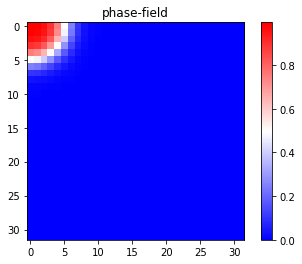

nstep =  100


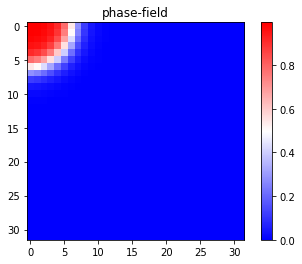

nstep =  200


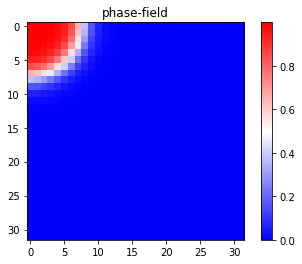

nstep =  300


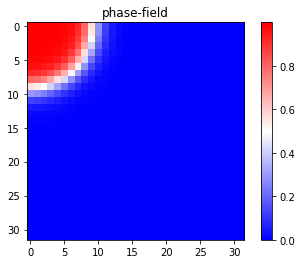

nstep =  400


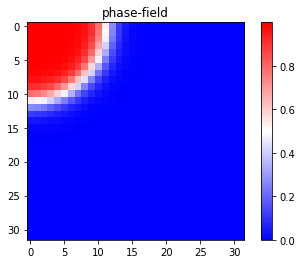

nstep =  500


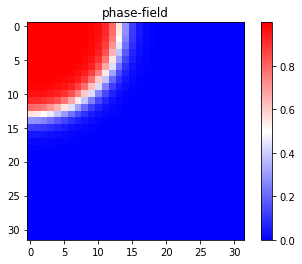

nstep =  600


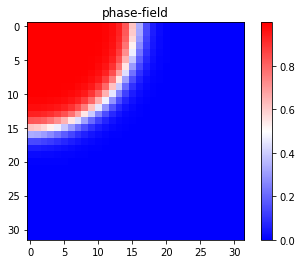

nstep =  700


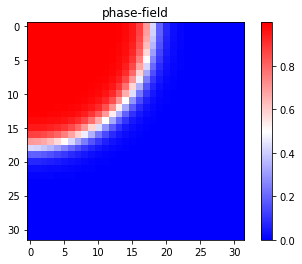

nstep =  800


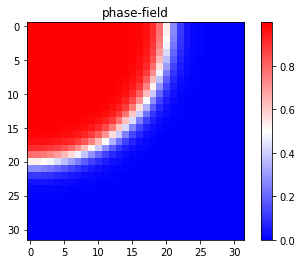

nstep =  900


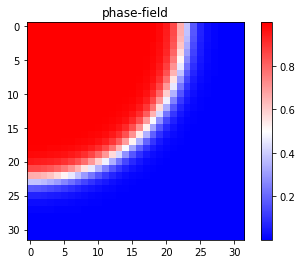

nstep =  1000


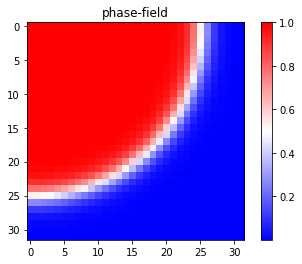

In [ ]:
for t in range(nsteps+1):
    for j in range(ny):
        for i in range(nx):
            ip = i + 1
            im = i - 1
            jp = j + 1
            jm = j - 1
            if ip > nx - 1:
                ip = nx -1
            if im < 0:
                im = 0
            if jp > ny - 1:
                jp = ny -1
            if jm < 0:
                jm = 0
            p_new[i,j] = p[i,j] + pmobi * ( 4.*www*p[i,j]*(1.-p[i,j])*(p[i,j]-0.5+3./(2.*www)*eee) + aaa*aaa*((p[ip,j] - 2*p[i,j] + p[im,j])/dx/dx + (p[i,jp] - 2*p[i,j] + p[i,jm])/dy/dy) ) * dt
    p = p_new

    if t % 100 == 0:
      print('nstep = ', t)
      plt.imshow(p, cmap='bwr')
      plt.title('phase-field')
      plt.colorbar()
      plt.show() 